<a href="https://colab.research.google.com/github/anshika-pathakk/ML-Lab_Experiments/blob/main/Exp10/solvingMDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Value Function:


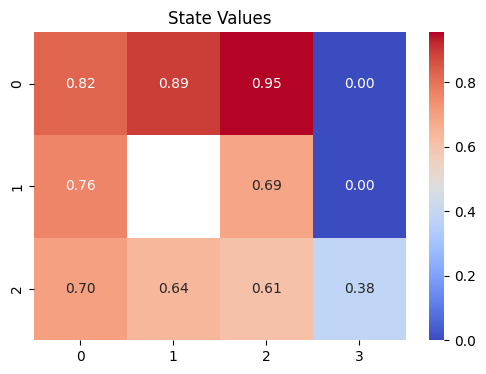

Final Policy:
['>', '>', '>', '+1']
['^', ' ', '^', '-1']
['^', '<', '^', '<']


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Define GridWorld


rows, cols = 3, 4
gamma = 0.99
living_penalty = -0.04

goal_state = (0, 3)
pit_state = (1, 3)
wall_state = (1, 1)

# Define actions
ACTIONS = ['up', 'down', 'left', 'right']

# All valid states
states = [(r, c) for r in range(rows) for c in range(cols) if (r, c) != wall_state]

# Reward function
def get_reward(state):
    if state == goal_state:
        return 1.0
    elif state == pit_state:
        return -1.0
    else:
        return living_penalty

# Movement helper
def move(state, action):
    r, c = state
    if state in [goal_state, pit_state]:
        return state
    if action == 'up':
        r = max(r - 1, 0)
    elif action == 'down':
        r = min(r + 1, rows - 1)
    elif action == 'left':
        c = max(c - 1, 0)
    elif action == 'right':
        c = min(c + 1, cols - 1)
    if (r, c) == wall_state:
        return state
    return (r, c)

# Transition model
def get_next_states(state, action):
    if state in [goal_state, pit_state]:
        return [(1.0, state)]
    dirs = {'up': ['up', 'left', 'right'],
            'down': ['down', 'right', 'left'],
            'left': ['left', 'down', 'up'],
            'right': ['right', 'up', 'down']}
    probs = [0.8, 0.1, 0.1]
    return [(p, move(state, a2)) for p, a2 in zip(probs, dirs[action])]

# Task 2: Value Iteration

def value_iteration(theta=1e-4):
    V = {s: 0.0 for s in states}
    while True:
        delta = 0
        new_V = V.copy()
        for s in states:
            if s in [goal_state, pit_state]:
                continue
            q_values = []
            for a in ACTIONS:
                q = 0
                for p, s_next in get_next_states(s, a):
                    r = get_reward(s_next)
                    q += p * (r + gamma * V[s_next])
                q_values.append(q)
            new_V[s] = max(q_values)
            delta = max(delta, abs(V[s] - new_V[s]))
        V = new_V
        if delta < theta:
            break
    return V

# Task 3: Policy Extraction

def extract_policy(V):
    policy = {}
    for s in states:
        if s in [goal_state, pit_state]:
            policy[s] = ' '
            continue
        q_values = {}
        for a in ACTIONS:
            q = 0
            for p, s_next in get_next_states(s, a):
                r = get_reward(s_next)
                q += p * (r + gamma * V[s_next])
            q_values[a] = q
        best_action = max(q_values, key=q_values.get)
        policy[s] = best_action
    return policy

# Task 4: Visualization

def plot_values(V, title="State Values"):
    grid = np.zeros((rows, cols))
    for (r, c) in V:
        grid[r, c] = V[(r, c)]
    grid[wall_state] = np.nan
    plt.figure(figsize=(6, 4))
    sns.heatmap(grid, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

def print_policy(policy):
    symbols = {'up': '^', 'down': 'v', 'left': '<', 'right': '>'}
    grid = [[' ' for _ in range(cols)] for _ in range(rows)]
    for (r, c) in policy:
        if (r, c) == wall_state:
            grid[r][c] = 'W'
        elif (r, c) == goal_state:
            grid[r][c] = '+1'
        elif (r, c) == pit_state:
            grid[r][c] = '-1'
        else:
            grid[r][c] = symbols.get(policy[(r, c)], ' ')
    for row in grid:
        print(row)

# Run the pipeline


V = value_iteration()
policy = extract_policy(V)

print("Final Value Function:")
plot_values(V)
print("Final Policy:")
print_policy(policy)

# Analysis Experiments

def run_analysis(penalty):
    global living_penalty
    living_penalty = penalty
    V = value_iteration()
    policy = extract_policy(V)
    print(f"\nLiving Penalty = {penalty}")
    plot_values(V, title=f"Values with Living Penalty = {penalty}")
    print_policy(policy)

# Uncomment these to test the analysis questions:
# run_analysis(-0.0)
# run_analysis(-0.5)
